In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
stats = pd.read_csv('charcters_stats.csv')
stats

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436
...,...,...,...,...,...,...,...,...,...
606,Yellowjacket,good,88,10,12,28,12,14,164
607,Yellowjacket II,good,50,10,35,28,31,28,182
608,Ymir,good,50,100,27,100,83,28,388
609,Zatanna,good,75,10,23,28,100,56,292


# Core

## 캐릭터는 저마다 지능, 힘, ... 등 다양한 수치를 지니고 있다. 이러한 수치의 합이 가장 큰 캐릭터는 누구인가? 이를 보이기 위한 과정을 보여라.

### 조건부 인덱싱

In [6]:
stats[stats['Total'] == max(stats['Total'])]

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
361,Martian Manhunter,good,100,100,96,100,100,85,581


### 정렬

In [12]:
stats.sort_values('Total', ascending=False).head(1)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
361,Martian Manhunter,good,100,100,96,100,100,85,581


## 좋은 캐릭터와 나쁜 캐릭터의 능력치들의 수치 분포를 알고 싶다. 이를 표현하기 위한 적절한 그래프를 선택해서 이를 위한 전처리를 진행하고, 시각화하여라.

In [18]:
stats.groupby('Alignment').describe().T

Alignment                  bad        good     neutral
Intelligence count  165.000000  432.000000   11.000000
             mean    50.018182   41.995370   60.909091
             std     35.412116   31.901821   18.479473
             min      1.000000    1.000000   38.000000
             25%      1.000000    1.000000   50.000000
             50%     55.000000   50.000000   50.000000
             75%     75.000000   63.000000   75.000000
             max    113.000000  100.000000  100.000000
Strength     count  165.000000  432.000000   11.000000
             mean    34.363636   26.638889   45.727273
             std     34.614795   31.422119   38.332991
             min      1.000000    1.000000   10.000000
             25%      1.000000    1.000000   14.500000
             50%     13.000000   10.000000   30.000000
             75%     63.000000   48.000000   85.000000
             max    100.000000  100.000000  100.000000
Speed        count  165.000000  432.000000   11.000000
             mean    27.684848   26.685185   46.727273
             std     25.960995   25.530982   25.479760
             min      1.000000    1.000000   17.000000
             25%      1.000000    1.000000   29.500000
             50%     23.000000   23.000000   42.000000
             75%     38.000000   38.500000   54.000000
             max    100.000000  100.000000  100.000000
Durability   count  165.000000  432.000000   11.000000
             mean    46.284848   39.293981   75.545455
             std     37.909843   35.585838   32.327585
             min      1.000000    1.000000   10.000000
             25%      1.000000    1.000000   63.000000
             50%     42.000000   28.000000   97.000000
             75%     85.000000   70.000000  100.000000
             max    120.000000  110.000000  100.000000
Power        count  165.000000  432.000000   11.000000
             mean    44.230303   38.291667   58.818182
             std     35.858738   33.895542   31.047764
             min      0.000000    0.000000   12.000000
             25%      0.000000    0.000000   34.500000
             50%     45.000000   35.000000   62.000000
             75%     71.000000   65.250000   84.500000
             max    100.000000  100.000000  100.000000
Combat       count  165.000000  432.000000   11.000000
             mean    44.630303   42.085648   67.636364
             std     32.397724   33.552737   25.784774
             min      1.000000    1.000000   28.000000
             25%      1.000000    1.000000   48.000000
             50%     56.000000   42.000000   70.000000
             75%     70.000000   70.000000   87.500000
             max    100.000000  101.000000  100.000000
Total        count  165.000000  432.000000   11.000000
             mean   247.212121  214.990741  355.363636
             std    174.965808  163.305515  122.137032
             min      5.000000    5.000000  196.000000
             25%      5.000000    5.000000  259.000000
             50%    271.000000  244.000000  366.000000
             75%    373.000000  339.750000  412.500000
             max    579.000000  581.000000  553.000000

In [25]:
graph_stats = stats.drop('Total', axis=1)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat
0,3-D Man,good,50,31,43,32,25,52
1,A-Bomb,good,38,100,17,80,17,64
2,Abe Sapien,good,88,14,35,42,35,85
3,Abin Sur,good,50,90,53,64,84,65
4,Abomination,bad,63,80,53,90,55,95
...,...,...,...,...,...,...,...,...
606,Yellowjacket,good,88,10,12,28,12,14
607,Yellowjacket II,good,50,10,35,28,31,28
608,Ymir,good,50,100,27,100,83,28
609,Zatanna,good,75,10,23,28,100,56


### 캐릭터 성향별 능력치

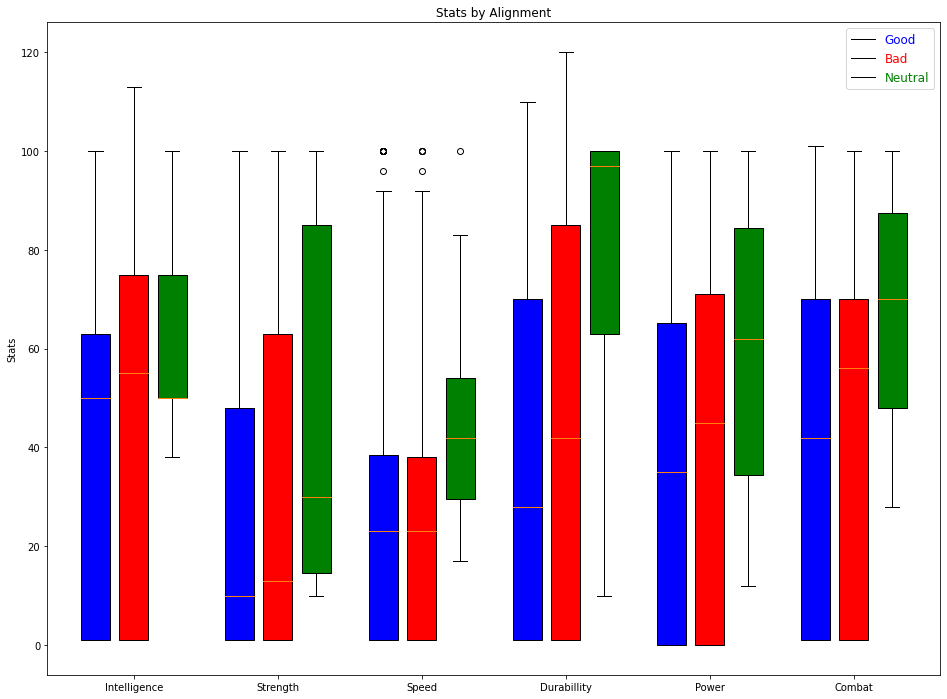

In [112]:
plt.figure(figsize=(16,12))

bp1 = plt.boxplot(x=graph_stats[stats['Alignment'] == 'good'].drop(['Name', 'Alignment'],axis=1), positions=np.arange(1,9.1, 1.5)-0.4, widths=0.3, patch_artist=True)
bp2 = plt.boxplot(x=graph_stats[stats['Alignment'] == 'bad'].drop(['Name', 'Alignment'],axis=1),positions=np.arange(1,9.1, 1.5), widths=0.3, patch_artist=True)
bp3 = plt.boxplot(x=graph_stats[stats['Alignment'] == 'neutral'].drop(['Name', 'Alignment'],axis=1),positions=np.arange(1,9.1, 1.5)+0.4, widths=0.3, patch_artist=True)

plt.xticks(np.arange(1,9.1, 1.5), ['Intelligence', 'Strength', 'Speed', 'Durabillity', 'Power', 'Combat'])


for box in bp1['boxes'] :
    box.set_facecolor('blue')

for box in bp2['boxes'] :
    box.set_facecolor('red')

for box in bp3['boxes'] :
    box.set_facecolor('green')

plt.title('Stats by Alignment')
plt.ylabel('Stats')

plt.legend(['Good', 'Bad', 'Neutral'], labelcolor=['blue', 'red', 'green'], fontsize='12')

plt.show()

### 캐릭터 성향별 능력치 합

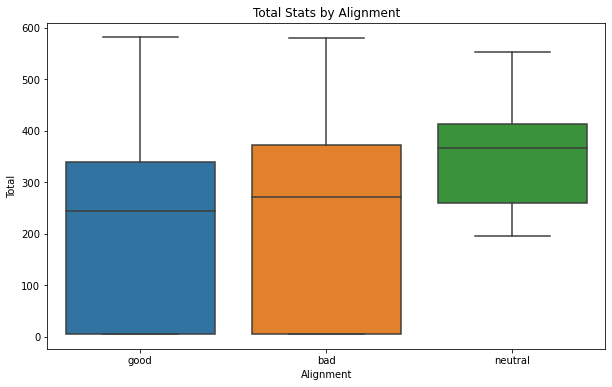

In [119]:
plt.figure(figsize=(10,6))

sns.boxplot(x='Alignment', y='Total', data=stats)

plt.title('Total Stats by Alignment')
plt.show()

### 전체 캐릭터 능력치 합 분포

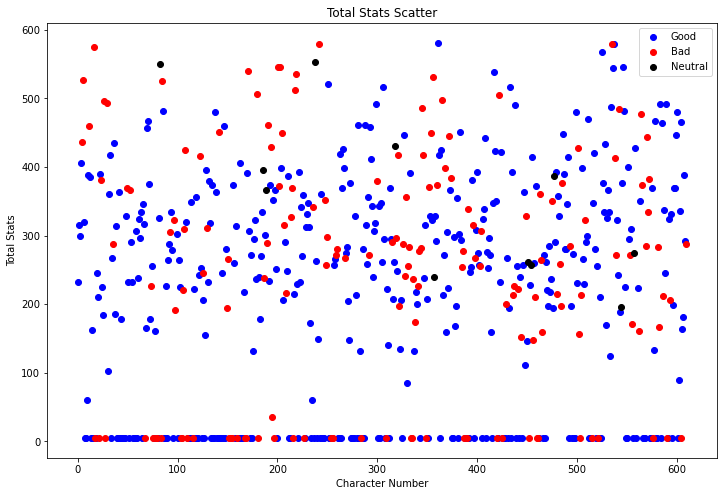

In [127]:
plt.figure(figsize=(12,8))

plt.scatter(x=stats[stats['Alignment']=='good'].index, y=stats['Total'][stats['Alignment']=='good'], color='blue')
plt.scatter(x=stats[stats['Alignment']=='bad'].index, y=stats['Total'][stats['Alignment']=='bad'], color='red')
plt.scatter(x=stats[stats['Alignment']=='neutral'].index, y=stats['Total'][stats['Alignment']=='neutral'], color='black')

plt.title('Total Stats Scatter')
plt.ylabel('Total Stats')
plt.xlabel('Character Number')

plt.legend(['Good', 'Bad', 'Neutral'])

plt.show()

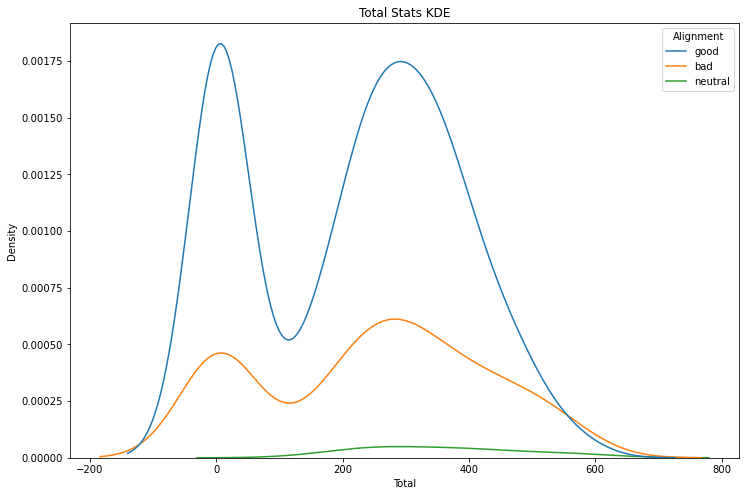

In [140]:
plt.figure(figsize=(12,8))

sns.kdeplot(x='Total', hue='Alignment', data=stats)

plt.title('Total Stats KDE')
plt.show()